# Federated Averaging Logistic Regression

## Set up Data Federation

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import load_iris
import numpy as np

def get_iris_dataframe():

    iris = load_iris()
    df1 = pd.DataFrame(iris.data, columns=iris.feature_names)
    target = iris.target_names
    encoder = OneHotEncoder(sparse=False)
    target =encoder.fit_transform(iris.target.reshape(-1, 1))
    df2 =pd.get_dummies(pd.DataFrame(target, columns=iris.target_names))
    dataframe = pd.concat([df1, df2], axis=1)

    return dataframe

def get_test_federation_split(df):

    train = df.sample(frac=0.8, random_state=0)
    test = df.drop(train.index)
    
    shuffled = train.sample(frac=1)
    result = np.array_split(shuffled, 5)  

    return result, test

dataframe = get_iris_dataframe()
data_federation, test = get_test_federation_split(dataframe)

## Run Federated Averaging

In [2]:
from sail_safe_functions_orchestrator.machine_learning.federated_averaging import federated_averaging
from helper_libs.shared.models.LogisticRegression import LogisticRegression
from helper_libs.shared.models.MultiLayer import MultiLayer

X_col = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Y_col = ['setosa', 'versicolor', 'virginica']
in_layer = len(X_col)
out_layer = len(Y_col)
optimizer = "SGD"
criterion = "MSELoss"
starting_model_0 = LogisticRegression(in_layer, in_layer)
starting_model_1 = LogisticRegression(in_layer, out_layer)
starting_model = MultiLayer([starting_model_0, starting_model_1])
learn_rate = 0.1
epochs=5000
federal_epochs=2

# model = federated_averaging(epochs, federal_epochs, data_federation, X_col, Y_col, learn_rate, starting_model, criterion, optimizer)

SyntaxError: invalid syntax (MultiLayer.py, line 2)

### Compare Random and Trained Models

/tmp/ipykernel_1669/1596800982.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  plt.plot(column_a, predictions, 'go', label='Predictions', color="red", alpha=0.2)


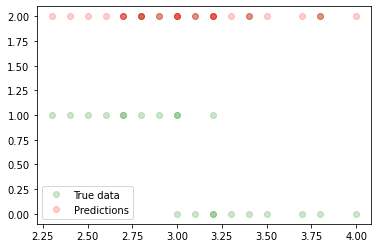

/tmp/ipykernel_1669/1596800982.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  plt.plot(column_a, predictions, 'go', label='Predictions', color="red", alpha=0.2)


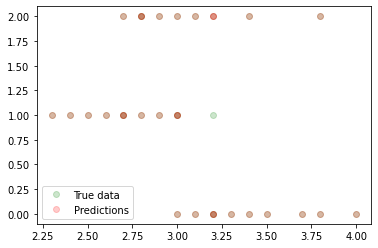

In [59]:
import torch
import matplotlib.pyplot as plt

def print_graph(predicted, x_train, y_train):


    predictions = []
    for prediction in predicted:
            predictions.append(prediction.argmax())

    labels = []
    for y in y_train:
            labels.append(int(y.argmax()))

    column_a = []
    for x in x_train:
        column_a.append(x[1])

    plt.plot(column_a, labels, 'go', label='True data', alpha=0.2)
    plt.plot(column_a, predictions, 'go', label='Predictions', color="red", alpha=0.2)
    plt.legend(loc='best')
    plt.show()

X_test = torch.Tensor(test[X_col].values).float()
Y_test = torch.Tensor(test[Y_col].values).float()

predicted = starting_model(X_test)
print_graph(predicted, X_test, Y_test)

predicted = model(torch.Tensor(test[X_col].values).float())
print_graph(predicted, X_test, Y_test)

In [61]:
from sklearn.metrics import precision_score, recall_score, f1_score

def score_model(predicted, Y_test):
    predictions = []
    for prediction in predicted:
            predictions.append(prediction.argmax())

    labels = []
    for y in Y_test:
            labels.append(int(y.argmax()))

    precision = precision_score(predictions, labels, average="weighted")
    recall = recall_score(predictions, labels, average="weighted")
    f1 = f1_score(predictions, labels, average="weighted")

    return precision, recall, f1

In [62]:
print(score_model(predicted, Y_test))

(0.9696969696969696, 0.9666666666666667, 0.9665831244778613)
